# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
# import cv2
import random
from sklearn.utils import shuffle
from PIL import Image
import os

pd.options.display.max_columns = 50

Using TensorFlow backend.


In [2]:
np.random.seed(1707)

In [3]:
print(tf.__version__)
print(keras.__version__)

1.12.0
2.2.4


In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train["features"])
# TODO: Number of validation examples
n_validation = len(valid["features"])


# TODO: Number of testing examples.
n_test = len(test["features"])


# TODO: What's the shape of an traffic sign image?
image_shape = train["features"].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(len(np.unique(train["labels"])), len(np.unique(valid["labels"])) ,len(np.unique(test["labels"])))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
n_channels = image_shape[-1]

In [7]:
# sanity check
assert len(train["features"]) == len(train["labels"])
assert len(valid["features"]) == len(valid["labels"])
assert len(test["features"]) == len(test["labels"])

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
signnames = pd.read_csv("signnames.csv")
signnames.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [9]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

#### Visualize how many times a sign appears in the training set

In [10]:
# aka the distribution of labels
import collections

signs_count = collections.Counter(y_train)
signs_count_df = pd.DataFrame(signs_count.most_common(), columns=["ClassId", "NumOccurences"])

# match to sign names
signnames_occur = signnames.merge(signs_count_df, on="ClassId")
signnames_occur.sort_values(by="NumOccurences")

,ClassId,SignName,NumOccurences
0,0,Speed limit (20km/h),180
37,37,Go straight or left,180
19,19,Dangerous curve to the left,180
32,32,End of all speed and passing limits,210
27,27,Pedestrians,210
41,41,End of no passing,210
42,42,End of no passing by vehicles over 3.5 metric ...,210
24,24,Road narrows on the right,240
29,29,Bicycles crossing,240
39,39,Keep left,270


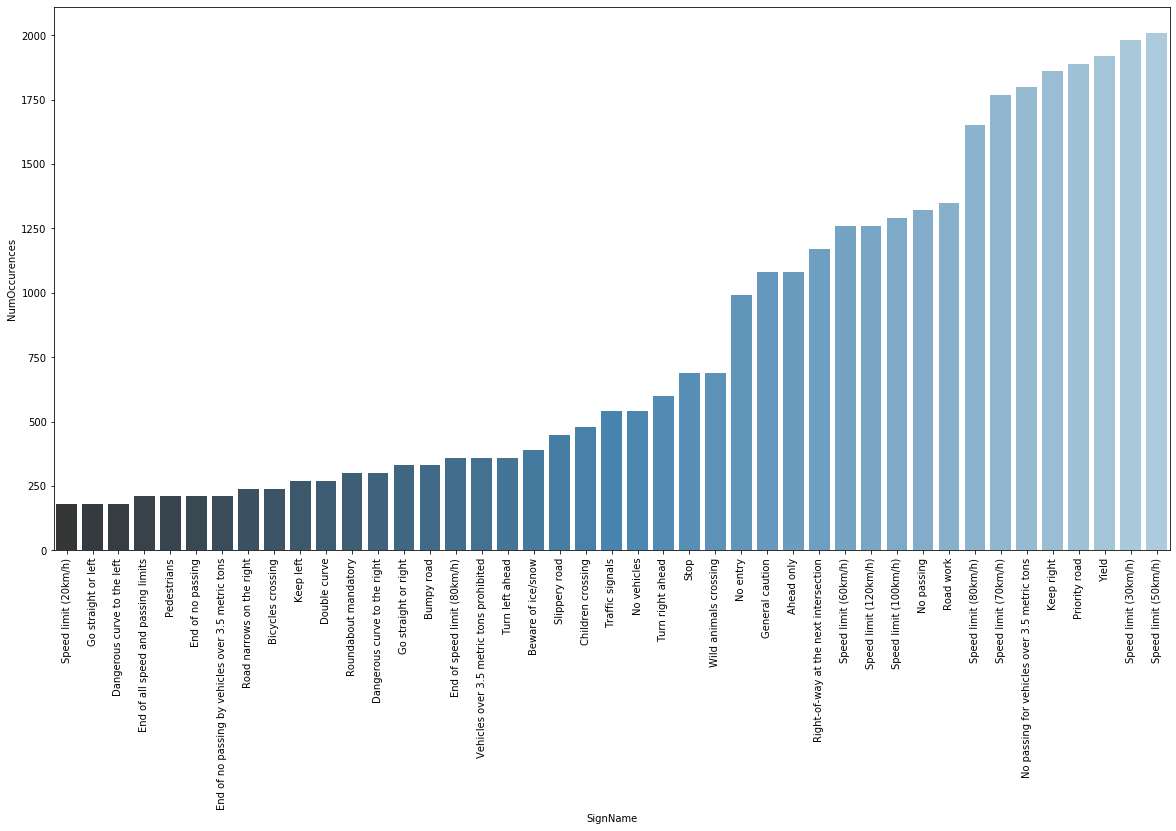

In [13]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="SignName", y="NumOccurences", data=signnames_occur.sort_values(by="NumOccurences"), palette="Blues_d")
plt.xticks(rotation=90)
plt.savefig("images-for-writeup/hist-signs.jpg", bbox_inches='tight')

**Observation**

Dataset is a bit unbalanced. For some signs (Speed limit (50km/h)) there are almost 10x as many samples as for others (Go straight or left). 
A possible consequence is that it's possible that the algorithm is able to detect some signs better than others, simply because the neural net is exposed to more samples of that class.

#### Visualize examples of each sign

In [14]:
y_train_labels = pd.DataFrame(y_train, columns=["ClassId"]).merge(signnames_occur, on="ClassId").reset_index()
y_train_labels.rename(columns={"index": "ImageId"}, inplace=True)
y_train_images_per_class = y_train_labels.groupby(["SignName", "ClassId"])["ImageId"].apply(list).reset_index()

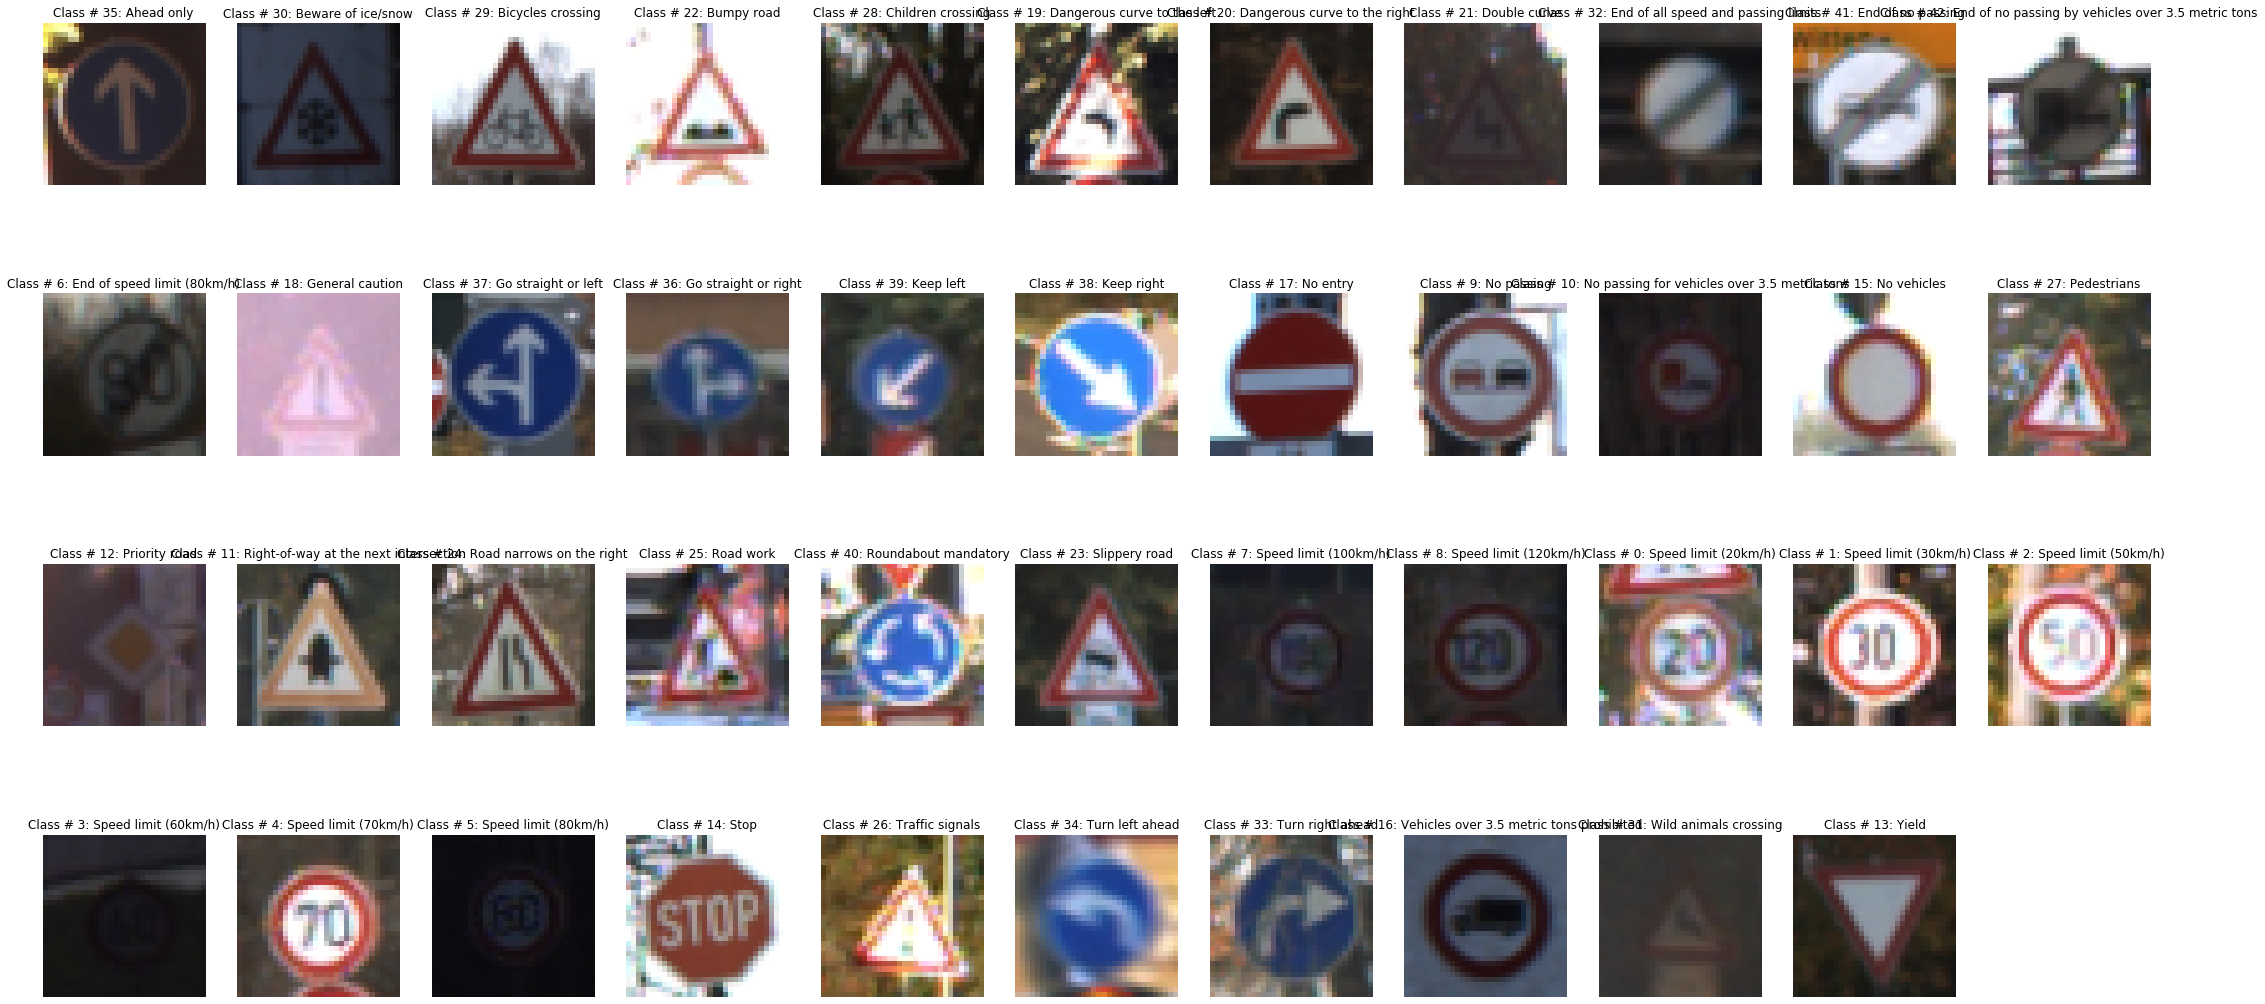

In [16]:
### Show number of images per label
# Run the cell multiple times to see different output
fig, ax = plt.subplots(figsize=(30, 15))
plt.tight_layout()

for index, row in y_train_images_per_class.iterrows():
    img_idx = random.choice(row["ImageId"])
    img = X_train[img_idx]
    plt.subplot(4, 11, index+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Class # {row['ClassId']}: {row['SignName']}")
              
plt.savefig("images-for-writeup/example-signs.jpg", bbox_inches="tight")

**Observation**

For each class there are some very dark images where one can almost not see anything.
As a possible preprocessing step one could pick out those dark images and work with the contrast to make it lighter. Or one could simply drop those images

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train, X_valid, X_test = train["features"], valid["features"], test["features"]
y_train, y_valid, y_test = train["labels"], valid["labels"], test["labels"]

In [18]:
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001

In [19]:
# I have tested two normalization strategies; I have found simply dividing each pixel by 255 
# (which scales the image to a [0, 1] range works the best
def quick_normalize(X):
    return X/255.0

def min_max_normalize(image_data, min_range=0.1, max_range=0.9):
    img_max, img_min = image_data.max(), image_data.min()
    image_scaled = min_range+(image_data-img_min)*(max_range-min_range)/(img_max-img_min)
    return image_scaled

In [20]:
X_train, X_valid, X_test = quick_normalize(X_train), quick_normalize(X_valid), quick_normalize(X_test)

### Model Architecture

In [48]:
# I'm using the LeNet architecture from the lecture with some slight modifications
# 1. I'm using all three color channels
# 2. For the convolutional layers I'm using a deeper feature map size (12 and 24)

from tensorflow.contrib.layers import flatten

def LeNetModified(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, n_channels, 12], mean=mu, stddev=sigma)),  # USE TRUNCATED_NORMAL WITH MU AND SIGMA
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 12, 24], mean=mu, stddev=sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([5*5*24, 120], mean=mu, stddev=sigma)),
        'wfc2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))}
    
    biases = {
        'bc1': tf.Variable(tf.truncated_normal([12], mean=mu, stddev=sigma)),
        'bc2': tf.Variable(tf.truncated_normal([24], mean=mu, stddev=sigma)),
        'bfc1': tf.Variable(tf.truncated_normal([120], mean=mu, stddev=sigma)),
        'bfc2': tf.Variable(tf.truncated_normal([84], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes], mean=mu, stddev=sigma))}
    conv1 = tf.nn.conv2d(x, 
                         weights["wc1"], 
                         strides=[1, 1, 1, 1], 
                         padding="VALID") 
    conv1 = tf.nn.bias_add(conv1, biases["bc1"])
    conv1 = tf.nn.relu(conv1)
    
    pool1 = tf.nn.max_pool(conv1,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')
    
    conv2 = tf.nn.conv2d(pool1, 
                         weights["wc2"], 
                         strides=[1, 1, 1, 1], 
                         padding="VALID") 
    conv2 = tf.nn.bias_add(conv2, biases["bc2"])
    conv2 = tf.nn.relu(conv2)
    pool2 = tf.nn.max_pool(conv2,
                           ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1],
                           padding='SAME')
    
    fc1 = tf.contrib.layers.flatten(pool2)
    fc1 = tf.add(tf.matmul(fc1, weights['wfc1']), biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    fc2 = tf.add(tf.matmul(fc1, weights["wfc2"]), biases["bfc2"])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return logits

In [49]:
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [50]:
logits = LeNetModified(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

In [51]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [52]:
model_file = './lenet'

In [53]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, model_file)
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.738
Validation Accuracy = 0.690

EPOCH 2 ...
Training Accuracy = 0.909
Validation Accuracy = 0.854

EPOCH 3 ...
Training Accuracy = 0.946
Validation Accuracy = 0.897

EPOCH 4 ...
Training Accuracy = 0.969
Validation Accuracy = 0.934

EPOCH 5 ...
Training Accuracy = 0.979
Validation Accuracy = 0.937

EPOCH 6 ...
Training Accuracy = 0.985
Validation Accuracy = 0.946

EPOCH 7 ...
Training Accuracy = 0.986
Validation Accuracy = 0.944

EPOCH 8 ...
Training Accuracy = 0.989
Validation Accuracy = 0.953

EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.944

EPOCH 10 ...
Training Accuracy = 0.994
Validation Accuracy = 0.962

Model saved


In [56]:
# Evaluate Test set
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, model_file)

    test_accuracy = evaluate(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy: 0.943784639633372


In [57]:
# Get predictions
with tf.Session() as sess:
    saver.restore(sess, model_file)
    yhat_test= sess.run(tf.argmax(logits, 1), {x : X_test, keep_prob:1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [131]:
confusion = tf.confusion_matrix(labels=y_test, predictions=yhat_test, num_classes=n_classes)
conf_matrix = confusion.eval(session=tf.Session())
conf_matrix_df = pd.DataFrame.from_records(conf_matrix, columns=signnames["SignName"].unique())
conf_matrix_df.index = signnames["SignName"].unique()
conf_matrix_df

,Speed limit (20km/h),Speed limit (30km/h),Speed limit (50km/h),Speed limit (60km/h),Speed limit (70km/h),Speed limit (80km/h),End of speed limit (80km/h),Speed limit (100km/h),Speed limit (120km/h),No passing,No passing for vehicles over 3.5 metric tons,Right-of-way at the next intersection,Priority road,Yield,Stop,No vehicles,Vehicles over 3.5 metric tons prohibited,No entry,General caution,Dangerous curve to the left,Dangerous curve to the right,Double curve,Bumpy road,Slippery road,Road narrows on the right,Road work,Traffic signals,Pedestrians,Children crossing,Bicycles crossing,Beware of ice/snow,Wild animals crossing,End of all speed and passing limits,Turn right ahead,Turn left ahead,Ahead only,Go straight or right,Go straight or left,Keep right,Keep left,Roundabout mandatory,End of no passing,End of no passing by vehicles over 3.5 metric tons
Speed limit (20km/h),47,1,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (30km/h),2,693,8,0,14,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Speed limit (50km/h),0,14,728,4,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (60km/h),0,0,0,439,0,7,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (70km/h),5,21,7,1,616,0,0,1,3,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (80km/h),0,8,33,19,0,556,1,1,2,0,5,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
End of speed limit (80km/h),0,0,0,1,0,0,113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,2,0,0,2,12
Speed limit (100km/h),0,1,0,0,1,10,0,398,34,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (120km/h),0,0,0,2,5,6,0,4,430,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
No passing,0,0,0,4,0,0,0,0,0,462,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I picked a total of 11 images from Google images of german traffic signs. 6 of them occur quite often in the training dataset. (*Priority road, No vehicles, Stop, No entry, Speed limit 120, Right-of-way at next intersection*)

I also chose an additional 6 images specifically because they weren't that represented in the training set, because I wanted to see how the model performs on these rather rare images. (*Bumpy road, Speed limit 20, Go straight or left, Road narrows on the right, End of all speed and passing limits*)

I downloaded the images and cropped them by manually using a bounding box to center out the actual traffic sign in the images.

Afterwards the pipeline to get the pictures into the correct format is very simple:
    
    - shape the image to 32x32
    - then normalize it to [0,1] using the quick_normalize() function

In [59]:
def reshape_size(file, height=32, width=32):
    img = Image.open(file).convert("RGB")
    img_resized = np.array(img.resize((height, width)))
    return img_resized

In [60]:
downloaded_signs_path = "examples/downloaded_signs/"
resized_path = os.path.join(downloaded_signs_path, "32x32")
files = os.listdir(downloaded_signs_path)
img_names = [f for f in files if f.endswith("jpeg") or f.endswith("jpg") or f.endswith("png")]

In [61]:
img_array = []
for img in img_names:
    img_resized = reshape_size(os.path.join(downloaded_signs_path, img))
    img_array.append(img_resized)
img_array = np.asarray(img_array)
label_array = np.array([12, 22, 0, 15, 14, 17, 37, 24, 8, 32, 11])
assert len(img_array) == len(label_array)
assert type(label_array) == type(y_train)
assert type(img_array) == type(X_train)

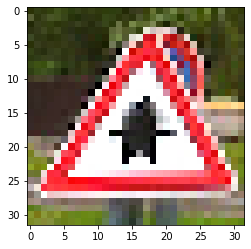

In [62]:
plt.imshow(img_array[10])

### Predict the Sign Type for Each Image

In [63]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

test_set = quick_normalize(img_array)

In [64]:
with tf.Session() as sess:
    saver.restore(sess, model_file)
    test_accuracy = evaluate(test_set, label_array)

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy: 0.8181818127632141


### Analyze Performance

In [65]:
# Here is a function to predict images and output human readable sign names
def predict(test_set):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        results = sess.run(tf.argmax(logits, 1), {x : test_set, keep_prob:1.0})
    return results

In [66]:
predictions = predict(test_set) 
predictions == label_array
# Got 9 out of 11 correct

INFO:tensorflow:Restoring parameters from ./lenet


array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True])

In [76]:
wrong_pred_idx = np.where(predictions != label_array)[0]
true_test_labels = label_array[(predict(test_set) == label_array) == False]
wrong_pred_labels = predictions[(predict(test_set) == label_array) == False]
print(true_test_labels)
print(wrong_pred_labels)

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
[24  8]
[12  1]


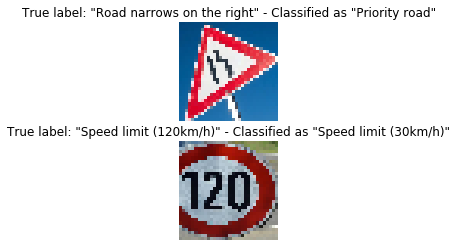

In [98]:
# Let's look at the ones that were incorrectly classified
for plot_idx, img_idx in enumerate(wrong_pred_idx):
    true_label = signnames.loc[signnames["ClassId"]==label_array[img_idx], "SignName"].to_list()[0]
    classified_label = signnames.loc[signnames["ClassId"]==predictions[img_idx], "SignName"].to_list()[0]
    plt.subplot(len(wrong_pred_idx), 1, plot_idx+1)
    plt.imshow(test_set[img_idx])
    plt.axis('off')
    plt.title(f'True label: "{true_label}" - Classified as "{classified_label}"')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [99]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, model_file)
    pred = tf.nn.softmax(logits)
    probs = sess.run(tf.nn.top_k(pred, k=5), {x : test_set, keep_prob:1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [100]:
pred_probs, pred_labels = probs[0], probs[1]

In [117]:
dict_preds = {"true_label": [], "top5_pred": [], "top5_probs": []}
for label, pred_label, pred_prob in zip(label_array, pred_labels, pred_probs):
    dict_preds["true_label"].append(label)
    dict_preds["top5_pred"].append(pred_label)
    dict_preds["top5_probs"].append(pred_prob)

In [122]:
predictions_df = pd.DataFrame.from_dict(dict_preds)
predictions_df.merge(signnames_occur, left_on="true_label", right_on="ClassId").drop("ClassId", axis=1)

,true_label,top5_pred,top5_probs,SignName,NumOccurences
0,12,"[12, 42, 6, 32, 41]","[0.9999887, 3.9781103e-06, 2.2038878e-06, 1.92...",Priority road,1890
1,22,"[22, 26, 29, 25, 18]","[0.9999918, 6.952109e-06, 1.1675332e-06, 1.302...",Bumpy road,330
2,0,"[0, 38, 32, 18, 1]","[0.8947337, 0.09593495, 0.0071178763, 0.001708...",Speed limit (20km/h),180
3,15,"[15, 9, 35, 13, 2]","[0.9952454, 0.0044667465, 0.00026961393, 1.401...",No vehicles,540
4,14,"[14, 17, 1, 29, 0]","[0.99580127, 0.0035776163, 0.00034087538, 9.61...",Stop,690
5,17,"[17, 26, 14, 18, 4]","[0.99988294, 5.6139987e-05, 3.3234606e-05, 1.1...",No entry,990
6,37,"[37, 4, 39, 18, 26]","[0.99066544, 0.005375378, 0.003956961, 8.21338...",Go straight or left,180
7,24,"[12, 26, 1, 17, 14]","[0.99629754, 0.002324914, 0.00055008463, 0.000...",Road narrows on the right,240
8,8,"[1, 0, 11, 2, 31]","[0.999385, 0.00053589034, 3.6882047e-05, 2.632...",Speed limit (120km/h),1260
9,32,"[32, 6, 41, 3, 0]","[0.99837947, 0.001582114, 3.8167527e-05, 8.549...",End of all speed and passing limits,210


For the two images which were incorrectly predicted, the algorithm was quite confident on the number 1 prediction (probabilities > 0.99).
Also the true class is not in the top 5 predictions

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Further ideas for improvement:
    
- collect additional images of underrepresented classes or use image augmentation techniques (random rotation, changes in lighting, zooming etc.) in order to get more balanced classes
- counter overfitting through regularization techniques (weight decay aka l1/l2 regularization, more dropout, early stopping, batch-norm etc.)
- look at training and validation losses instead of the metric (loss may increase although accuracy increases!)

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")